<a href="https://colab.research.google.com/github/trungnguyen020/6351071072_LAB1/blob/main/6351071072_LAB1_BAI2_Trang37_38.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mlxtend xlrd openpyxl

In [3]:
#Câu 1
print("Nguyễn Đức Trung _ 6351071072")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel('Online Retail.xlsx')
df.info()

Nguyễn Đức Trung _ 6351071072
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
#Câu 2
print("Nguyễn Đức Trung _ 6351071072")
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df.head(10)

Nguyễn Đức Trung _ 6351071072


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
#Câu 3
print("Nguyễn Đức Trung _ 6351071072")
print("Các hóa đơn tín dụng (đơn hủy) trước khi xóa:")
display(df[df.InvoiceNo.str.contains('C', na=False)].head())
df = df[~df['InvoiceNo'].str.contains('C')]
print("\nĐã xóa xong các hóa đơn tín dụng.")
print("Kích thước dữ liệu hiện tại:", df.shape)

Nguyễn Đức Trung _ 6351071072
Các hóa đơn tín dụng (đơn hủy) trước khi xóa:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom



Đã xóa xong các hóa đơn tín dụng.
Kích thước dữ liệu hiện tại: (532621, 8)


Nguyễn Đức Trung _ 6351071072


<Axes: ylabel='Country'>

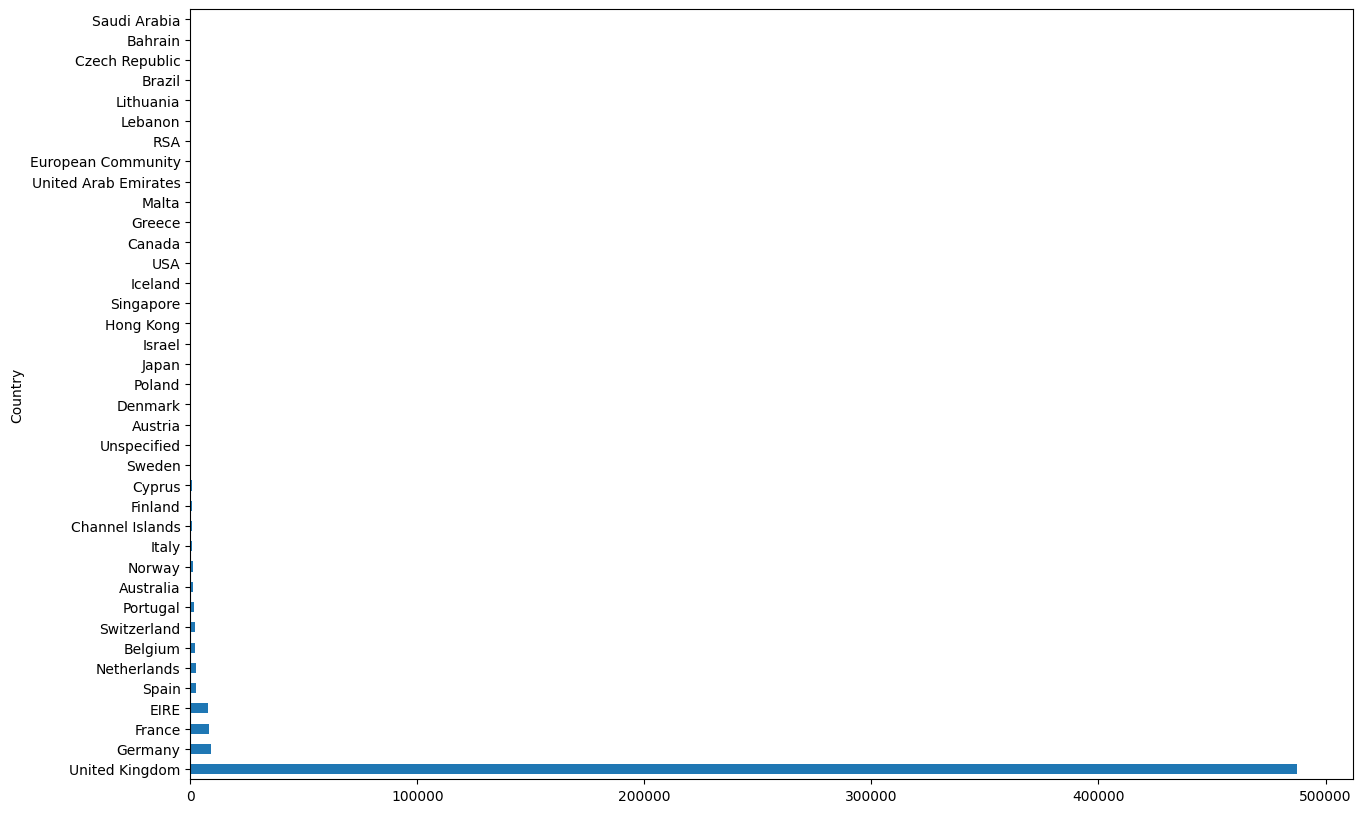

In [6]:
# Câu 4
print("Nguyễn Đức Trung _ 6351071072")

df['Country'].value_counts().plot(kind='barh', figsize=(15,10))

In [7]:
# Câu 5
print("Nguyễn Đức Trung - 6351071072")
basket = df[df['Country'] == "United Kingdom"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum()
print(basket.head())

Nguyễn Đức Trung - 6351071072
InvoiceNo  Description                        
536365     CREAM CUPID HEARTS COAT HANGER         8
           GLASS STAR FROSTED T-LIGHT HOLDER      6
           KNITTED UNION FLAG HOT WATER BOTTLE    6
           RED WOOLLY HOTTIE WHITE HEART.         6
           SET 7 BABUSHKA NESTING BOXES           2
Name: Quantity, dtype: int64


In [8]:
# câu 6
print("Nguyễn Đức Trung - 6351071072")
basket = basket.unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket.head(10)

Nguyễn Đức Trung - 6351071072


Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#câu 7
print("Nguyễn Đức Trung - 6351071072")
def encode_data(datapoint):
    if datapoint <= 0:
        return 0
    if datapoint >= 1:
        return 1

basket = basket.applymap(encode_data)

Nguyễn Đức Trung - 6351071072


In [10]:
#Câu 8
print("Nguyễn Đức Trung _ 6351071072")

basket.drop('POSTAGE', inplace=True, axis=1)
print("Đã xóa cột POSTAGE")

Nguyễn Đức Trung _ 6351071072
Đã xóa cột POSTAGE


In [11]:
#Câu 9
print("Nguyễn Đức Trung - 6351071072")

frequent_itemsets = apriori(basket, min_support=0.03, use_colnames=True)
print("--- Các tập phổ biến (Top 5) ---")
print(frequent_itemsets.head())

Nguyễn Đức Trung - 6351071072
--- Các tập phổ biến (Top 5) ---
    support                           itemsets
0  0.045803           (6 RIBBONS RUSTIC CHARM)
1  0.031124  (60 CAKE CASES VINTAGE CHRISTMAS)
2  0.040339      (60 TEATIME FAIRY CAKE CASES)
3  0.046928       (ALARM CLOCK BAKELIKE GREEN)
4  0.035142        (ALARM CLOCK BAKELIKE PINK)


In [12]:
#Câu 10
print("Nguyễn Đức Trung - 6351071072")

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print("\n--- Các luật kết hợp tìm được (Top 5) ---")
print(rules[['antecedents', 'consequents', 'support', 'confidence']].head())

Nguyễn Đức Trung - 6351071072

--- Các luật kết hợp tìm được (Top 5) ---
                         antecedents                        consequents  \
0       (ALARM CLOCK BAKELIKE GREEN)         (ALARM CLOCK BAKELIKE RED)   
1         (ALARM CLOCK BAKELIKE RED)       (ALARM CLOCK BAKELIKE GREEN)   
2   (PINK REGENCY TEACUP AND SAUCER)  (GREEN REGENCY TEACUP AND SAUCER)   
3  (GREEN REGENCY TEACUP AND SAUCER)   (PINK REGENCY TEACUP AND SAUCER)   
4  (ROSES REGENCY TEACUP AND SAUCER)  (GREEN REGENCY TEACUP AND SAUCER)   

    support  confidence  
0  0.030160    0.642694  
1  0.030160    0.605376  
2  0.030910    0.820768  
3  0.030910    0.617773  
4  0.037553    0.732497  


Nguyễn Đức Trung - 6351071072


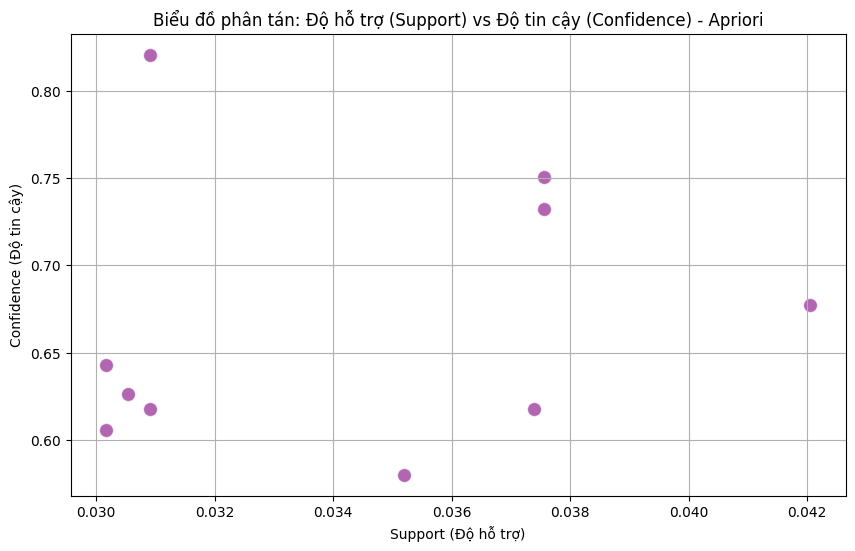

In [13]:
#Câu 11
print("Nguyễn Đức Trung - 6351071072")

plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", data=rules, s=100, color='purple', alpha=0.6)

plt.title("Biểu đồ phân tán: Độ hỗ trợ (Support) vs Độ tin cậy (Confidence) - Apriori")
plt.xlabel("Support (Độ hỗ trợ)")
plt.ylabel("Confidence (Độ tin cậy)")
plt.grid(True)
plt.show()

In [14]:
#Câu 12
print("Nguyễn Đức Trung - 6351071072")

from mlxtend.frequent_patterns import fpgrowth
frequent_itemsets_fp = fpgrowth(basket, min_support=0.03, use_colnames=True)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.5)
print("--- Kết quả luật kết hợp từ FP-Growth (Top 5) ---")
print(rules_fp[['antecedents', 'consequents', 'support', 'confidence']].head())
print("\n--- SO SÁNH ---")
print(f"Số lượng tập phổ biến (Apriori): {len(frequent_itemsets)}")
print(f"Số lượng tập phổ biến (FP-Growth): {len(frequent_itemsets_fp)}")
print(f"Số lượng luật kết hợp (Apriori): {len(rules)}")
print(f"Số lượng luật kết hợp (FP-Growth): {len(rules_fp)}")

Nguyễn Đức Trung - 6351071072
--- Kết quả luật kết hợp từ FP-Growth (Top 5) ---
                           antecedents                 consequents   support  \
0            (JUMBO BAG PINK POLKADOT)   (JUMBO BAG RED RETROSPOT)  0.042053   
1             (JUMBO STORAGE BAG SUKI)   (JUMBO BAG RED RETROSPOT)  0.037392   
2     (JUMBO  BAG BAROQUE BLACK WHITE)   (JUMBO BAG RED RETROSPOT)  0.030535   
3  (JUMBO SHOPPER VINTAGE RED PAISLEY)   (JUMBO BAG RED RETROSPOT)  0.035196   
4         (ALARM CLOCK BAKELIKE GREEN)  (ALARM CLOCK BAKELIKE RED)  0.030160   

   confidence  
0    0.677308  
1    0.617699  
2    0.626374  
3    0.579876  
4    0.642694  

--- SO SÁNH ---
Số lượng tập phổ biến (Apriori): 131
Số lượng tập phổ biến (FP-Growth): 131
Số lượng luật kết hợp (Apriori): 10
Số lượng luật kết hợp (FP-Growth): 10
